In [1]:
#import matplotlib 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta

In [4]:
# Python SQL toolkit and ORM
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
#create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite copy")

In [6]:
#declare base using auto_map()
base = automap_base()

In [7]:
#use basae class to reflect database tables
base.prepare(engine, reflect = True)

In [8]:
#print classes mapped to base
base.classes.keys()

['measurement', 'station']

In [9]:
#assing class to variable 
measurement = base.classes.measurement
station = base.classes.station

In [10]:
#create session
session = Session(engine)

In [11]:
#create inspector and connect to engine
inspector = inspect(engine)

In [12]:
#use the inspector to print column name within measurement 
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
#display row column data as dictionary
first = session.query(measurement).first()
first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc60e842630>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [14]:
#last point in database
last = session.query(measurement.date).order_by(measurement.date.desc()).first()

In [15]:
#calculate the date 1 yr. ago from last point in database
previous = dt.date(2017,8,23) - dt.timedelta(days = 365)
previous

datetime.date(2016, 8, 23)

In [16]:
precip = session.query(measurement.date, measurement.prcp).filter(measurement.date >= previous).all()

In [17]:
#save query results as df and set index to date column
df = pd.DataFrame(precip, columns=['Date', 'Precipitation'])

In [18]:
#sort df by date
df = df.sort_values('Date', ascending = True)

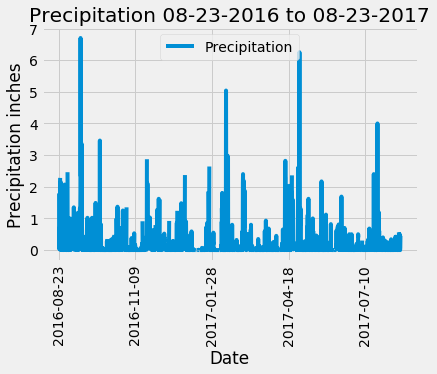

In [19]:
df.plot('Date','Precipitation')
plt.xticks(rotation=90)
plt.title('Precipitation 08-23-2016 to 08-23-2017')
plt.ylabel('Precipitation inches')
plt.xlabel('Date')
plt.show()

In [20]:
#summary statistics for precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
#use the inspector to print column name within station
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [22]:
counts = session.query(station.id).count()
counts

9

In [23]:
first1 = session.query(station).first()
first1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc60eaa7390>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0}

In [24]:
station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station)\
.order_by(func.count(measurement.station).desc()).all()
station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
min_temp

[(54.0)]

In [26]:
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station=='USC00519281').all()
max_temp

[(85.0)]

In [27]:
avg_temp= session.query(func.avg(measurement.tobs)).filter(measurement.station =='USC00519281').all()
avg_temp

[(71.66378066378067)]

In [28]:
station_temp = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()
station_temp

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
previous_temp = dt.date(2017,8,23) - dt.timedelta(days = 365)
previous_temp

datetime.date(2016, 8, 23)

In [30]:
temp = session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281',measurement.date >= previous_temp).all()

In [31]:
df1 = pd.DataFrame(temp, columns=['Date', 'Temperature'])

In [32]:
df1

,Date,Temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


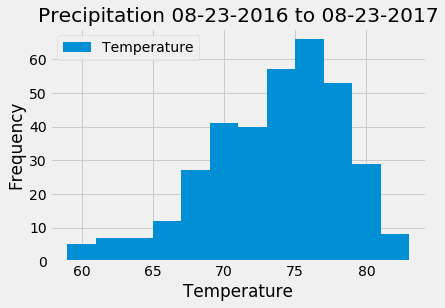

In [33]:
df1.plot.hist(bins=12)
plt.title('Precipitation 08-23-2016 to 08-23-2017')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()